In [134]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(font_scale=1.0)

In [64]:
PATH= "data/"
df1 = pd.read_csv(PATH+"train_FD001.txt", sep=' ', header=None)
df2 = pd.read_csv(PATH+"train_FD003.txt", sep=' ', header=None)

In [65]:
def data_merge(df1 ,df2) : 
    df2[0]= df2[0]+ df1[0].max()
    frames = [df1 , df2]
    df = pd.concat(frames)
    df.reset_index(level=0 , inplace=True)
    df.drop(['index'] , axis=1 , inplace=True)
    
    return df

In [66]:
def data_cleaning(Data): 
    Data.drop([26,27], axis=1, inplace=True)
    column_name = ['ID','Cycle', 'op_set_1','op_set_2','op_set_3', 's1','s2','s3','s4','s5','s6','s7','s8','s9',
              's10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    Data.columns=column_name
    
    ## TTF calculation 

    failure_cycle = pd.DataFrame(Data.groupby('ID')['Cycle'].max())
    failure_cycle.reset_index(level=0, inplace=True)
    failure_cycle.columns=['ID','ttf']
    Data= pd.merge(Data, failure_cycle, on='ID')
    Data['ttf']= Data['ttf'] - Data['Cycle']
    
    ## labeling data 
    Data['labels'] = Data['ttf'].apply(lambda x: 0 if x <= 10 else 1 if x<=30 else 2 if x<=100 else 3)
    Data.drop(['ttf'], axis=1,inplace=True)
    
    #Some features have all their values set to NaN in the correlation matrix, we simply drop them
    
    Data.drop(['s18', 's19','op_set_3'],axis=1, inplace=True)
    
    # Some feature have 0 correlation with target and the other features, we drop them too

    Data.drop(['op_set_1','op_set_2','s1','s5','s16'], axis=1,inplace=True)
    
    # Some features are highly correlated (>0.9), we drop one of them(s9,s14) (s8,s13) 
    
    Data.drop(['s12','s13','s14'], axis=1,inplace=True)
    
    ###
    return Data
    

In [67]:
df = data_merge(df1,df2)
df = data_cleaning(df)

In [154]:
df.head()

,ID,Cycle,s2,s3,s4,s6,s7,s8,s9,s10,s11,s15,s17,s20,s21,labels
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,1.3,47.47,8.4195,392,39.06,23.4190,3
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,1.3,47.49,8.4318,392,39.00,23.4236,3
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,1.3,47.27,8.4178,390,38.95,23.3442,3
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,1.3,47.13,8.3682,392,38.88,23.3739,3
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,1.3,47.28,8.4294,393,38.90,23.4044,3


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45351 entries, 0 to 45350
Data columns (total 16 columns):
ID        45351 non-null int64
Cycle     45351 non-null int64
s2        45351 non-null float64
s3        45351 non-null float64
s4        45351 non-null float64
s6        45351 non-null float64
s7        45351 non-null float64
s8        45351 non-null float64
s9        45351 non-null float64
s10       45351 non-null float64
s11       45351 non-null float64
s15       45351 non-null float64
s17       45351 non-null int64
s20       45351 non-null float64
s21       45351 non-null float64
labels    45351 non-null int64
dtypes: float64(12), int64(4)
memory usage: 5.9 MB


In [69]:
df.describe()

,ID,Cycle,s2,s3,s4,s6,s7,s8,s9,s10,s11,s15,s17,s20,s21,labels
count,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000,45351.000000
mean,104.447796,125.307049,642.559339,1589.190970,1406.501317,21.602193,554.335829,2388.082972,9064.625836,1.300671,47.472781,8.417088,392.859562,38.910178,23.346022,2.369363
std,56.544862,87.813757,0.524596,6.622906,9.687784,0.015103,2.752963,0.126904,20.970306,0.002645,0.292293,0.056212,1.698605,0.236600,0.141834,0.836908
min,1.000000,1.000000,640.840000,1564.300000,1377.060000,21.450000,549.610000,2386.900000,9017.980000,1.290000,46.690000,8.156300,388.000000,38.140000,22.872600,0.000000
25%,57.000000,57.000000,642.180000,1584.570000,1399.250000,21.600000,552.940000,2388.020000,9052.410000,1.300000,47.250000,8.386200,392.000000,38.760000,23.254500,2.000000
50%,108.000000,114.000000,642.520000,1588.800000,1405.510000,21.610000,553.700000,2388.080000,9060.360000,1.300000,47.440000,8.421300,393.000000,38.900000,23.342400,3.000000
75%,152.000000,174.000000,642.900000,1593.440000,1412.680000,21.610000,554.550000,2388.140000,9069.770000,1.300000,47.660000,8.453500,394.000000,39.050000,23.430100,3.000000
max,200.000000,525.000000,645.110000,1616.910000,1441.490000,21.610000,570.490000,2388.600000,9244.590000,1.320000,48.530000,8.584800,400.000000,39.850000,23.950500,3.000000


In [143]:
Engines= df.ID.unique()
nbr_engines=Engines.shape

## EDA : 
### Distribution of all engines with regards to their failure cycles:

Text(0.5, 1.0, '')

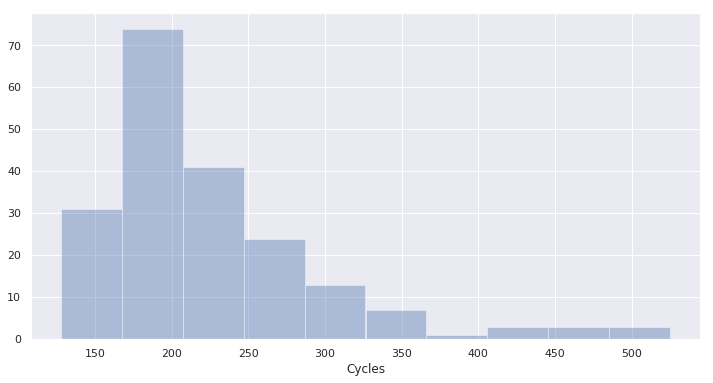

In [171]:
cycles_per_engine = pd.DataFrame(df.groupby('ID')['Cycle'].max())
cycles_per_engine.reset_index(level = 0 , inplace=True)
cycles_per_engine.columns = ['ID' , 'Cycles']
plt.figure(figsize=(12,6))
sns.distplot(cycles_per_engine.Cycles , bins= 10, kde=False)
plt.title("")

In [181]:
pd.DataFrame(cycles_per_engine.Cycles).quantile(0.75)

Cycles    256.25
Name: 0.75, dtype: float64

$\rightarrow$ We notice that : 75% of the engines fail before reaching 257 cycles.

### Feature correlation matrix : 

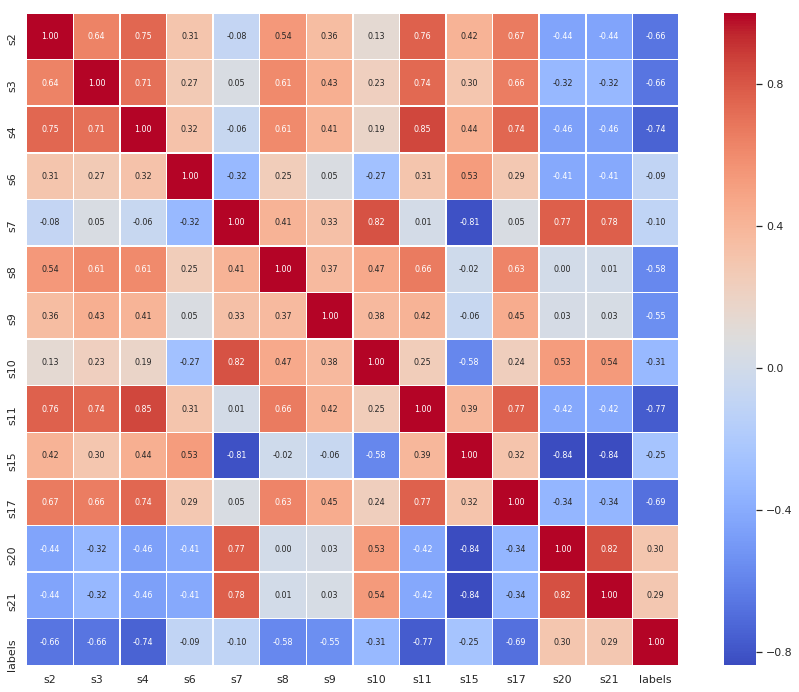

In [70]:
feature_corr = df.iloc[:,2:].corr()
plt.figure(figsize=(16,12))
sns.heatmap(feature_corr,annot=True,square=True,fmt='.2f',annot_kws={'size':8}, cmap='coolwarm',linewidths=.5)
plt.show()

### Feature distribution : 

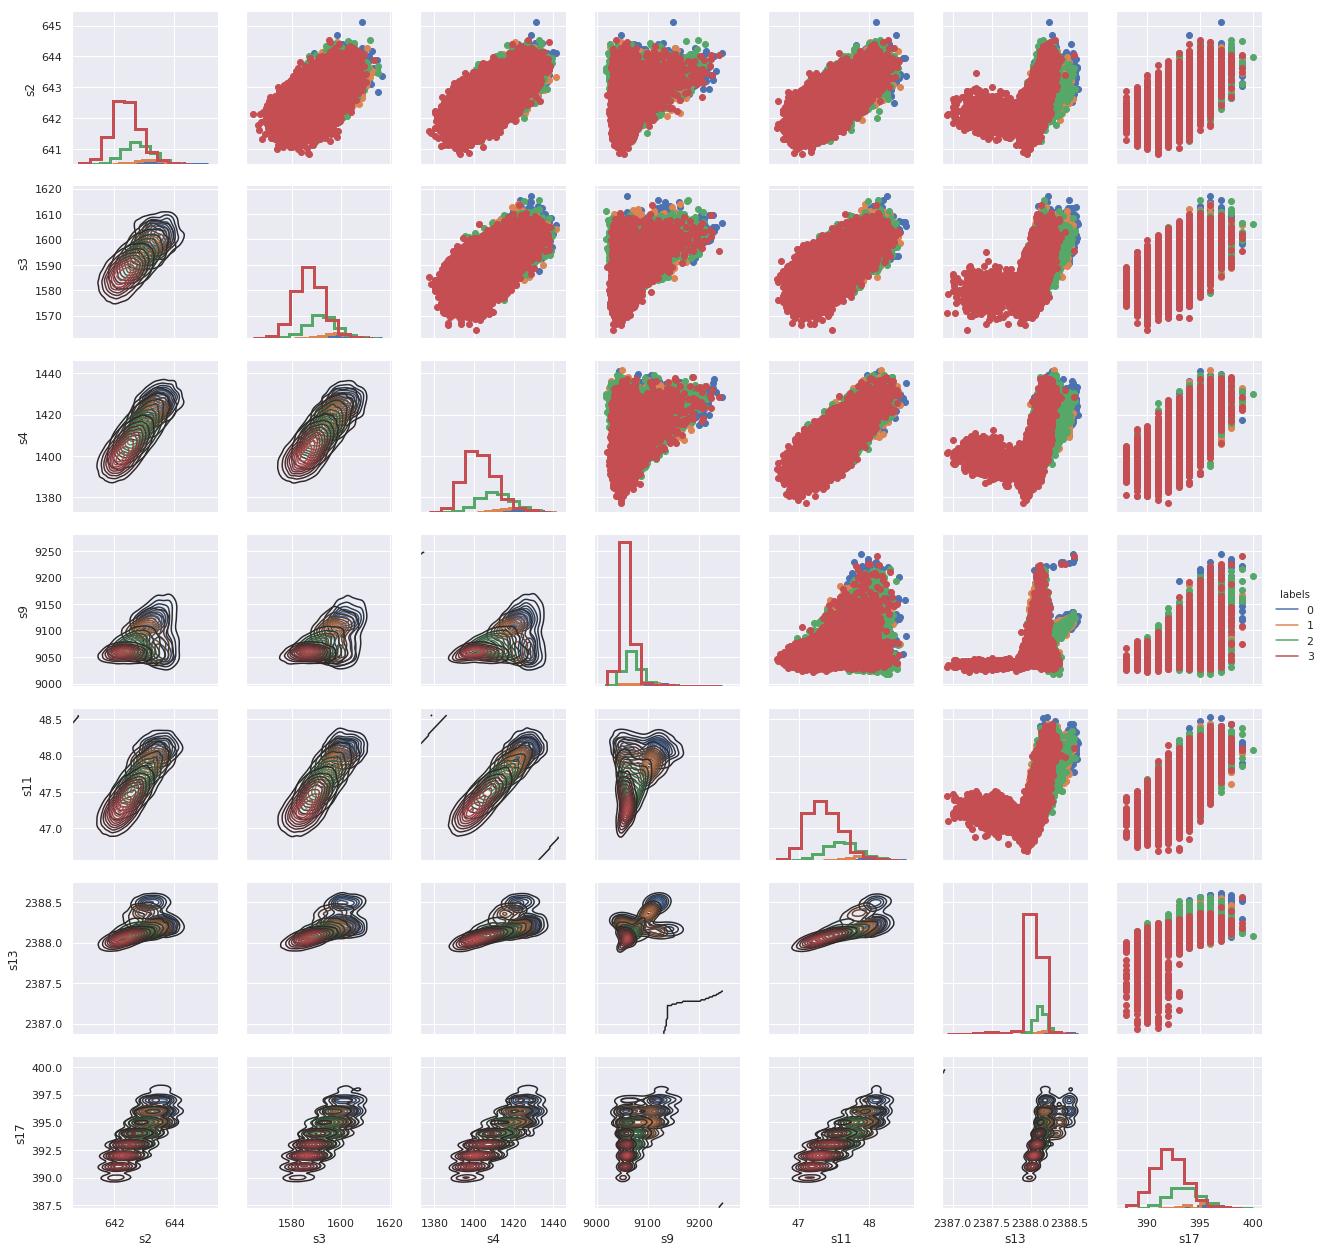

In [18]:
ft_to_pairplot=['s2','s3','s4','s9','s11','s13','s17','labels']
g = sns.PairGrid(df[ft_to_pairplot], hue="labels", vars=ft_to_pairplot[:-1])
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g = g.add_legend()

### Relevant features inspection : 

In [153]:
def viz_func(eng_id,df): 
    
    """ Plot time series of a single engine.
    
        Args:
        eng_id (int64): The id of the engine considered.

    Returns:
        plots
        
    """
    subset=df[df.ID==eng_id]
    f = subset.Cycle.iloc[-1]
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12,14), sharex=True)
    
    print (" Features inspection for engine : "+str(eng_id))
    ## Tempreture at LPC : 
    axes[0].plot(subset.Cycle , subset.s2)
    axes[0].legend(['s2(°R)'])
    axes[0].set_title('Tempretures at LPC outlet')
    
    ## Tempreture at HPC : 
    axes[1].plot(subset.Cycle , subset.s3)
    axes[1].legend(['s3(°R)'])
    axes[1].set_title('Tempretures at HPC outlet')
    
    ## Tempreture at LPT : 
    axes[2].plot(subset.Cycle , subset.s4)
    axes[2].legend(['s4(°R)'])
    axes[2].set_title('Tempretures at LPT outlet')
    
    ## Static pressure at HPC outlet
    
    axes[3].plot(subset.Cycle , subset.s11)
    axes[3].legend(['s11(psia)'])
    axes[3].set_title('Static pressure at HPC outlet')
    
    ## Physical core speed
    
    axes[4].plot(subset.Cycle , subset.s9)
    axes[4].legend(['s9(rpm)'])
    axes[4].set_title('Physical core speed')
    
    ## Physical fan speed
    
    axes[5].plot(subset.Cycle , subset.s8)
    axes[5].legend(['s8(rpm)'])
    axes[5].set_title('Physical fan speed')
    
    ## HPT coolant bleed
    axes[6].plot(subset.Cycle , subset.s20)
    axes[6].legend(['s20(lbm/s)'])
    axes[6].set_title('HPT coolant bleed')
    
    for ax in axes:
        ax.axvline(f-10,color='r',label='ttf =10')
        ax.axvline(f-30,color='g',label='ttf =30')
        ax.axvline(f-100,color='k',label='ttf =100')
        
    plt.legend(loc=6)
    print('**************')
    return fig , axes

(<Figure size 864x1008 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd060f6b828>,
       dtype=object))

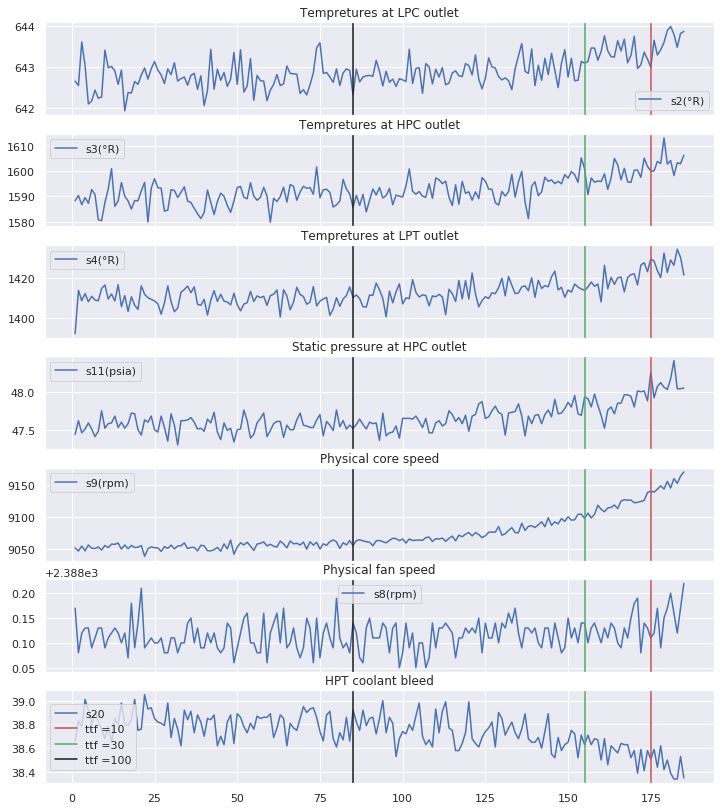

In [132]:
viz_func(80,df)

### Visualize randomly chosen engines :

 Features inspection for engine : 103
**************
 Features inspection for engine : 94
**************
 Features inspection for engine : 3
**************


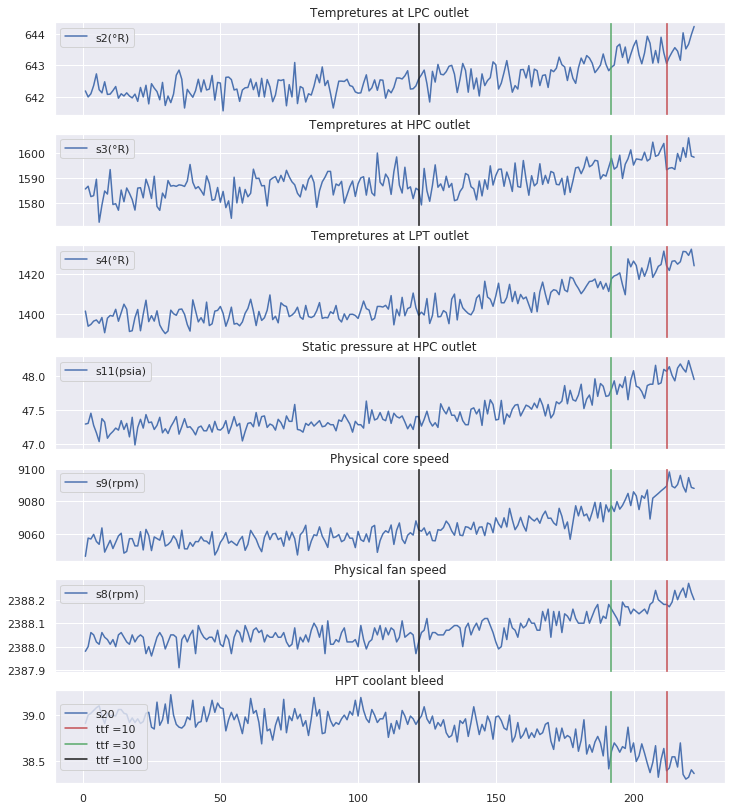

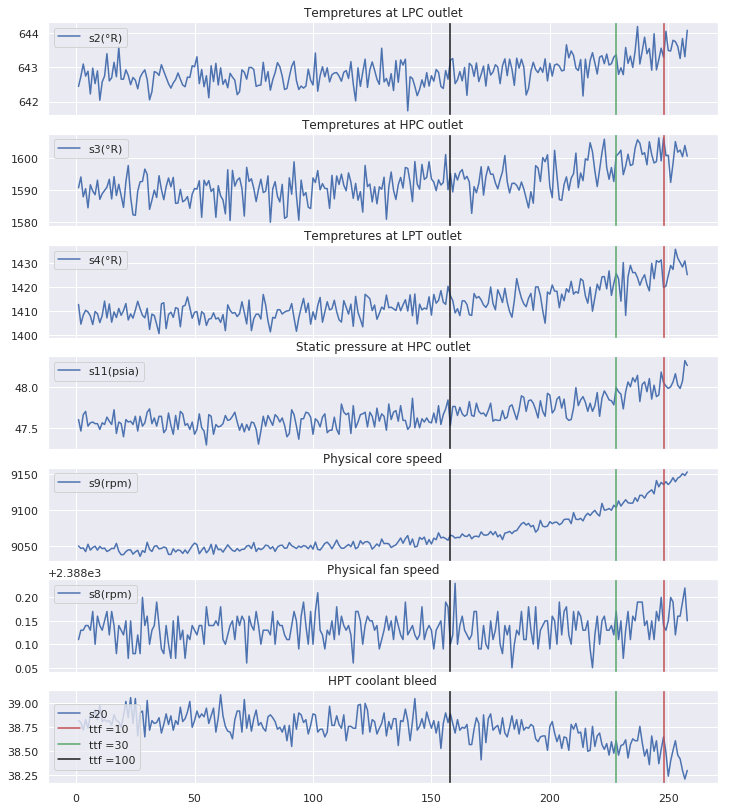

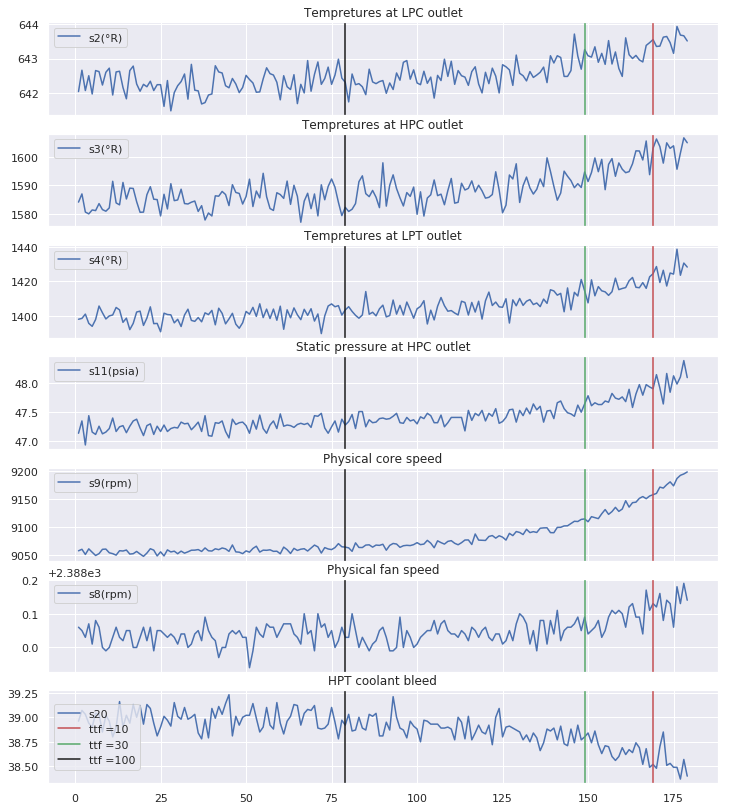

In [156]:
eng_ids = np.random.choice(Engines, size=3)
for eng in eng_ids: 
    viz_func(eng,df)
    

### Classes caracteristics ( more visualisation to do )

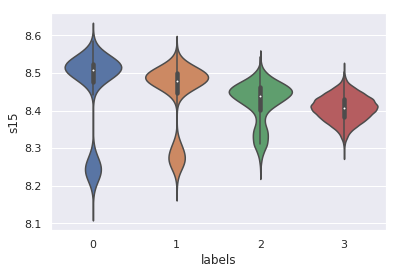

In [183]:
sns.violinplot(data=df,x="labels", y="s15")

According to the documentation coming with the data, the columns correspond to: </b>

1) Unit number or ID of the engine

2) Time in cycles

3) to 5) Operational settings 1 to 3

6) to 26) Sensor measurements 1 to 21

These measurements include various sensor response surfaces and operability margins :

* s1 : Total temperature at fan inlet
* s2: Total temperature at LPC outlet
* s3 : Total temperature at HPC (High-Pressure Compressor) outlet
* s4: Total temperature at LPT outlet
* s5: Pressure at fan inlet
* s6 : Total pressure in bypass-duct
* s7 :Total pressure at HPC outlet
* s8: Physical fan speed
* s9 :Physical core speed
* s10: Engine pressure ratio (P50/P2)
* s11: Static pressure at HPC outlet
* s12: Ratio of fuel flow to Ps30
* s13: Corrected fan speed
* s14: Corrected core speed
* s15: Bypass Ratio
* s16 :Burner fuel-air ratio
* s17 : Bleed Enthalpy
* s18: Demanded fan speed
* s19: Demanded corrected fan speed
* s20 :HPT coolant bleed
* s21 : LPT coolant bleed
